In [1]:
import numpy as np
import pandas as pd
import pickle
from sklearn import datasets # sklearn comes with some toy datasets to practise
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from matplotlib import pyplot
from sklearn.metrics import silhouette_score
import spotipy
import json
from spotipy.oauth2 import SpotifyClientCredentials

In [2]:
df = pd.read_csv(r"C:\Users\User\Downloads\song_df2.csv")


In [3]:
df.drop_duplicates()
df

,Unnamed: 0,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,label
0,0,0.561,0.520,11,-9.342,0,0.2440,0.05030,0.000002,0.3550,0.424,153.150,audio_features,1bDbXMyjaUIooNwFE9wn0N,spotify:track:1bDbXMyjaUIooNwFE9wn0N,https://api.spotify.com/v1/tracks/1bDbXMyjaUIo...,https://api.spotify.com/v1/audio-analysis/1bDb...,239360,3,hits
1,1,0.637,0.643,4,-6.571,1,0.0519,0.13000,0.000002,0.1420,0.533,97.008,audio_features,0V3wPSX9ygBnCm8psDIegu,spotify:track:0V3wPSX9ygBnCm8psDIegu,https://api.spotify.com/v1/tracks/0V3wPSX9ygBn...,https://api.spotify.com/v1/audio-analysis/0V3w...,200690,4,hits
2,2,0.714,0.472,2,-7.375,1,0.0864,0.01300,0.000005,0.2660,0.238,131.121,audio_features,3nqQXoyQOWXiESFLlDF1hG,spotify:track:3nqQXoyQOWXiESFLlDF1hG,https://api.spotify.com/v1/tracks/3nqQXoyQOWXi...,https://api.spotify.com/v1/audio-analysis/3nqQ...,156943,4,hits
3,3,0.686,0.507,1,-7.097,1,0.0357,0.62600,0.000075,0.3830,0.690,168.955,audio_features,5CM4UuQ9Gnd6K2YyKGPMoK,spotify:track:5CM4UuQ9Gnd6K2YyKGPMoK,https://api.spotify.com/v1/tracks/5CM4UuQ9Gnd6...,https://api.spotify.com/v1/audio-analysis/5CM4...,232115,4,hits
4,4,0.838,0.525,10,-3.562,1,0.0665,0.34500,0.000002,0.0771,0.884,144.981,audio_features,0QHEIqNKsMoOY5urbzN48u,spotify:track:0QHEIqNKsMoOY5urbzN48u,https://api.spotify.com/v1/tracks/0QHEIqNKsMoO...,https://api.spotify.com/v1/audio-analysis/0QHE...,134256,4,hits
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2127,423,0.763,0.405,9,-16.065,1,0.0427,0.60600,0.124000,0.1030,0.858,158.509,audio_features,2G2KFn0bw18vJakvnJuzsC,spotify:track:2G2KFn0bw18vJakvnJuzsC,https://api.spotify.com/v1/tracks/2G2KFn0bw18v...,https://api.spotify.com/v1/audio-analysis/2G2K...,226093,4,80_90
2128,424,0.566,0.585,9,-7.532,1,0.0320,0.10600,0.000000,0.2300,0.750,126.100,audio_features,57TaM8GozkJBz90xvQ1xME,spotify:track:57TaM8GozkJBz90xvQ1xME,https://api.spotify.com/v1/tracks/57TaM8GozkJB...,https://api.spotify.com/v1/audio-analysis/57Ta...,207173,4,80_90
2129,425,0.594,0.750,2,-7.216,1,0.0299,0.07570,0.000244,0.0593,0.693,122.949,audio_features,1r9QBciQVM1BnW72cQUA4R,spotify:track:1r9QBciQVM1BnW72cQUA4R,https://api.spotify.com/v1/tracks/1r9QBciQVM1B...,https://api.spotify.com/v1/audio-analysis/1r9Q...,245107,4,80_90
2130,426,0.527,0.923,9,-7.677,1,0.0599,0.00907,0.000026,0.3410,0.461,97.029,audio_features,0ykRm2cMP8ku2qRj5UpEsg,spotify:track:0ykRm2cMP8ku2qRj5UpEsg,https://api.spotify.com/v1/tracks/0ykRm2cMP8ku...,https://api.spotify.com/v1/audio-analysis/0ykR...,212333,4,80_90


In [4]:
df1=df[["danceability","energy","loudness","speechiness","acousticness",
    "instrumentalness","liveness","valence","tempo",]]
df1=df1.drop_duplicates()




In [5]:
df1.reset_index(drop=True)

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0.561,0.520,-9.342,0.2440,0.05030,0.000002,0.3550,0.424,153.150
1,0.637,0.643,-6.571,0.0519,0.13000,0.000002,0.1420,0.533,97.008
2,0.714,0.472,-7.375,0.0864,0.01300,0.000005,0.2660,0.238,131.121
3,0.686,0.507,-7.097,0.0357,0.62600,0.000075,0.3830,0.690,168.955
4,0.838,0.525,-3.562,0.0665,0.34500,0.000002,0.0771,0.884,144.981
...,...,...,...,...,...,...,...,...,...
1976,0.763,0.405,-16.065,0.0427,0.60600,0.124000,0.1030,0.858,158.509
1977,0.566,0.585,-7.532,0.0320,0.10600,0.000000,0.2300,0.750,126.100
1978,0.594,0.750,-7.216,0.0299,0.07570,0.000244,0.0593,0.693,122.949
1979,0.527,0.923,-7.677,0.0599,0.00907,0.000026,0.3410,0.461,97.029


In [6]:
scaler = StandardScaler()
scaler.fit(df1)
df1_scaled = scaler.transform(df1)
df1_scaled_df = pd.DataFrame(df1_scaled, columns = df1.columns)
display(df1.head())
print()
display(df1_scaled_df.head())

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0.561,0.520,-9.342,0.2440,0.0503,0.000002,0.3550,0.424,153.150
1,0.637,0.643,-6.571,0.0519,0.1300,0.000002,0.1420,0.533,97.008
2,0.714,0.472,-7.375,0.0864,0.0130,0.000005,0.2660,0.238,131.121
3,0.686,0.507,-7.097,0.0357,0.6260,0.000075,0.3830,0.690,168.955
4,0.838,0.525,-3.562,0.0665,0.3450,0.000002,0.0771,0.884,144.981


,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,-0.465853,-0.612655,-0.147660,1.773643,-0.569795,-0.494002,1.270253,-0.311452,1.234713
1,0.006024,-0.090612,0.323128,-0.393081,-0.288318,-0.494002,-0.253793,0.104475,-0.909987
2,0.484110,-0.816379,0.186530,-0.003950,-0.701528,-0.493994,0.633445,-1.021199,0.393176
3,0.310261,-0.667831,0.233761,-0.575803,1.463412,-0.493770,1.470597,0.703563,1.838486
4,1.254015,-0.591434,0.834351,-0.228405,0.471001,-0.494002,-0.718162,1.443837,0.922647


In [30]:
kmeans = KMeans(n_clusters=7, random_state=1234)
kmeans.fit(df1_scaled_df)

KMeans(n_clusters=7, random_state=1234)

In [31]:
kmeans.labels_

array([4, 6, 6, ..., 3, 1, 1])

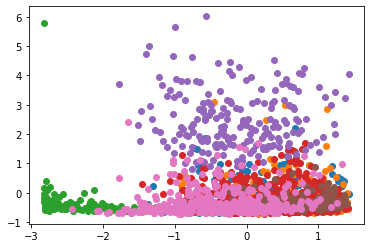

In [32]:
# assign a cluster to each example
labels = kmeans.predict(df1_scaled_df)
# retrieve unique clusters
clusters = np.unique(labels)
# create scatter plot for samples from each cluster
for cluster in clusters:
    # get row indexes for samples with this cluster
    row_ix = np.where(labels == cluster)
    # create scatter of these samples
    pyplot.scatter(df1_scaled_df.to_numpy()[row_ix, 1], df1_scaled_df.to_numpy()[row_ix, 3])
    # show the plot
pyplot.show()

In [33]:
clusters = kmeans.predict(df1_scaled_df)
#clusters
pd.Series(clusters).value_counts().sort_index()

0    225
1    251
2    145
3    621
4    200
5    153
6    386
dtype: int64

In [34]:
kmeans2 = KMeans(n_clusters=3,
                init="k-means++",
                n_init=50,  # try with 1, 4, 8, 20, 30, 100...
                max_iter=1,
                tol=0,
                algorithm="elkan",
                random_state=1234)
kmeans2.fit(df1_scaled_df)
print(kmeans2.inertia_)

10841.919649164358


Training a K-Means model with 2 clusters! 

Training a K-Means model with 3 clusters! 

Training a K-Means model with 4 clusters! 

Training a K-Means model with 5 clusters! 

Training a K-Means model with 6 clusters! 

Training a K-Means model with 7 clusters! 

Training a K-Means model with 8 clusters! 

Training a K-Means model with 9 clusters! 

Training a K-Means model with 10 clusters! 

Training a K-Means model with 11 clusters! 

Training a K-Means model with 12 clusters! 

Training a K-Means model with 13 clusters! 

Training a K-Means model with 14 clusters! 

Training a K-Means model with 15 clusters! 

Training a K-Means model with 16 clusters! 

Training a K-Means model with 17 clusters! 

Training a K-Means model with 18 clusters! 

Training a K-Means model with 19 clusters! 

Training a K-Means model with 20 clusters! 



Text(0.5, 1.0, 'Elbow Method showing the optimal k')

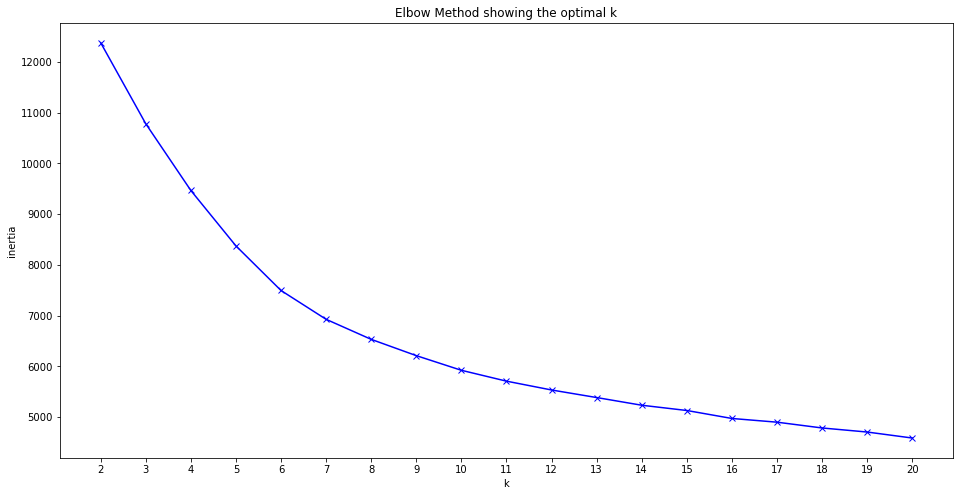

In [35]:
K = range(2, 21)
inertia = []

for k in K:
    print("Training a K-Means model with {} clusters! ".format(k))
    print()
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(df1_scaled_df)
    inertia.append(kmeans.inertia_)

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,8))
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Elbow Method showing the optimal k')

Text(0.5, 1.0, 'Silhouette Method showing the optimal k')

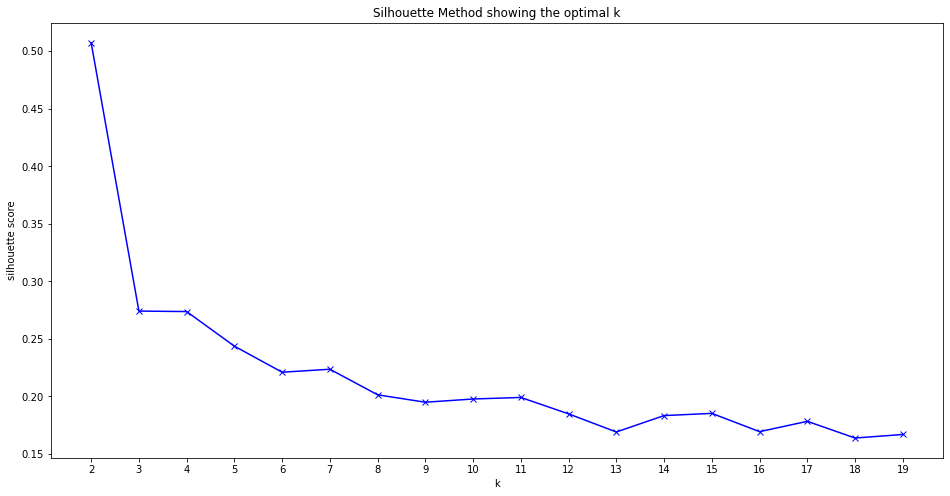

In [36]:
K = range(2, 20)
silhouette = []

for k in K:
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(df1_scaled_df)
    
    filename = "kmeans_" + str(k) + ".pickle"
    with open(filename, "wb") as f:
        pickle.dump(kmeans,f)
    
    silhouette.append(silhouette_score(df1_scaled_df, kmeans.predict(df1_scaled_df)))


plt.figure(figsize=(16,8))
plt.plot(K, silhouette, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Silhouette Method showing the optimal k')

In [46]:
df2=pd.merge(df1_scaled_df,df[['id','label']],left_index=True,right_index=True)
df2

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,label
0,-0.465853,-0.612655,-0.147660,1.773643,-0.569795,-0.494002,1.270253,-0.311452,1.234713,1bDbXMyjaUIooNwFE9wn0N,hits
1,0.006024,-0.090612,0.323128,-0.393081,-0.288318,-0.494002,-0.253793,0.104475,-0.909987,0V3wPSX9ygBnCm8psDIegu,hits
2,0.484110,-0.816379,0.186530,-0.003950,-0.701528,-0.493994,0.633445,-1.021199,0.393176,3nqQXoyQOWXiESFLlDF1hG,hits
3,0.310261,-0.667831,0.233761,-0.575803,1.463412,-0.493770,1.470597,0.703563,1.838486,5CM4UuQ9Gnd6K2YyKGPMoK,hits
4,1.254015,-0.591434,0.834351,-0.228405,0.471001,-0.494002,-0.718162,1.443837,0.922647,0QHEIqNKsMoOY5urbzN48u,hits
...,...,...,...,...,...,...,...,...,...,...,...
1976,0.788347,-1.100744,-1.289884,-0.496849,1.392778,-0.100439,-0.532843,1.344625,1.439434,4R6oOgh523J4M1I0XYe14f,80_90
1977,-0.434809,-0.336779,0.159856,-0.617536,-0.373079,-0.494008,0.375860,0.932513,0.201367,0SLtqCrXBRrnkxSOMA3X4W,80_90
1978,-0.260959,0.363523,0.213543,-0.641222,-0.480090,-0.493234,-0.845523,0.715010,0.080995,3AQLL3Waks6LJ9FI8TFHGA,80_90
1979,-0.676956,1.097779,0.135220,-0.302848,-0.715408,-0.493924,1.170081,-0.170265,-0.909184,28WgIIhUP3crJLjV2UeSTG,80_90


In [47]:
df2["cluster"] = clusters
df2

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,label,cluster
0,-0.465853,-0.612655,-0.147660,1.773643,-0.569795,-0.494002,1.270253,-0.311452,1.234713,1bDbXMyjaUIooNwFE9wn0N,hits,4
1,0.006024,-0.090612,0.323128,-0.393081,-0.288318,-0.494002,-0.253793,0.104475,-0.909987,0V3wPSX9ygBnCm8psDIegu,hits,6
2,0.484110,-0.816379,0.186530,-0.003950,-0.701528,-0.493994,0.633445,-1.021199,0.393176,3nqQXoyQOWXiESFLlDF1hG,hits,6
3,0.310261,-0.667831,0.233761,-0.575803,1.463412,-0.493770,1.470597,0.703563,1.838486,5CM4UuQ9Gnd6K2YyKGPMoK,hits,1
4,1.254015,-0.591434,0.834351,-0.228405,0.471001,-0.494002,-0.718162,1.443837,0.922647,0QHEIqNKsMoOY5urbzN48u,hits,3
...,...,...,...,...,...,...,...,...,...,...,...,...
1976,0.788347,-1.100744,-1.289884,-0.496849,1.392778,-0.100439,-0.532843,1.344625,1.439434,4R6oOgh523J4M1I0XYe14f,80_90,3
1977,-0.434809,-0.336779,0.159856,-0.617536,-0.373079,-0.494008,0.375860,0.932513,0.201367,0SLtqCrXBRrnkxSOMA3X4W,80_90,3
1978,-0.260959,0.363523,0.213543,-0.641222,-0.480090,-0.493234,-0.845523,0.715010,0.080995,3AQLL3Waks6LJ9FI8TFHGA,80_90,3
1979,-0.676956,1.097779,0.135220,-0.302848,-0.715408,-0.493924,1.170081,-0.170265,-0.909184,28WgIIhUP3crJLjV2UeSTG,80_90,1


# Saving model

In [39]:
import pickle

scaler = StandardScaler()
model = KMeans()

def save(model, filename = 'filename.pickle'): 
    with open(filename, "wb") as f:
        pickle.dump(model, f)


In [40]:
save(model, filename = 'filename.pickle')

# Test


In [41]:
from IPython.display import IFrame

#track_id = "1rfORa9iYmocEsnnZGMVC4"
track_id= 'spotify:track:3hgl7EQwTutSm6PESsB7gZ'
IFrame(src="https://open.spotify.com/embed/track/"+track_id,
       width="320",
       height="80",
       frameborder="0",
       allowtransparency="true",
       allow="encrypted-media",
      )

In [42]:
def play_song(track_id):
    return IFrame(src="https://open.spotify.com/embed/track/"+track_id,
       width="320",
       height="80",
       frameborder="0",
       allowtransparency="true",
       allow="encrypted-media",
      )

In [48]:
play_song('7rYoS50ucgBq7tfJUxxn9Z')

<b> getting the track id

# Loading the pickle

In [24]:
def load(filename = "filename.pickle"): 
    try: 
        with open(filename, "rb") as f: 
            return pickle.load(f) 
        
    except FileNotFoundError: 
        print("File not found!") 

In [25]:
scaler2 = load("filename.pickle")

In [26]:
StandardScaler()


StandardScaler()

In [27]:
import spotipy
import json
from spotipy.oauth2 import SpotifyClientCredentials


#Initialize SpotiPy with user credentias
sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id= config.Client_ID,
                                                           client_secret= config.Client_Secret))



In [2]:
x = input('Please choose song name that you like:')
x1 = sp.search(x,limit=3,market="US")
print('Please select one of the options below:')
for item,x in zip(x1['tracks']['items'], range(1,4)):
    
    print("'{}', and the Artist is: {}".format(item['name'],item["artists"][0]["name"]),
          ', Please enter -',x )
x2=int(input('Your selection: '))
if x2  :
    af=sp.audio_features(x1["tracks"]["items"][x2-1]["id"])
    af=pd.DataFrame(af)
    af1=af[["danceability","energy","loudness","speechiness","acousticness",
    "instrumentalness","liveness","valence","tempo",]] 
    scaler.fit(af1)
    dfy_scaled = scaler.transform(af1)
    cluster = kmeans.predict(af1)
    no=cluster[0]
print(no)
    #choice=df2[df2['cluster']==no]
    #result=choice.sample()
    #st=str(result['id'].values)
#print("'", str(result['id']),"''")
# print('Here is our recommendation from ',results["tracks"]["items"][0]["artists"], 'to your favorite song ')
#print('Here is our recommendation:')
#play_song(st)


Please choose song name that you like:wish


NameError: name 'sp' is not defined

In [214]:
track_id

'7rYoS50ucgBq7tfJUxxn9Z'

In [ ]:
3hgl7EQwTutSm6PESsB7gZ

In [ ]:
if x2 == 1 :
    track_id=x1["tracks"]["items"][(0)]["id"]
track_id
if x2 == 2 :
    track_id=x1["tracks"]["items"][(1)]["id"]
track_id
if x2 == 3 :
    track_id=x1["tracks"]["items"][(2)]["id"]
track_id

# Without the pickle

In [ ]:
predict=pd.concat([df2,af1],ignore_index=True)
predict

In [ ]:
scaler = StandardScaler()
scaler.fit(predict)
predict_scaled = scaler.transform(predict)
predict_scaled_df = pd.DataFrame(predict_scaled, columns = predict.columns)
display(predict.head())
print()
display(predict_scaled_df.head())

In [ ]:
predict1_scaled_df=pd.merge(predict_scaled_df,df1[["speechiness","acousticness",
    "instrumentalness"]],left_index=True,right_index=True)
predict1_scaled_df